### Hoja de trabajo 9
### Sebastian Garcia 22291
### Jose Morales 22689

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
from scipy.stats import linregress
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import *
import sklearn.metrics as metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV,Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from joblib import dump, load
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


from scipy.stats import chi2_contingency
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Leer datos de un csv #

In [2]:
archivo1_csv = "train.csv"
datost = pd.read_csv(archivo1_csv, encoding='ISO-8859-1')

# - Analisis Exploratorio #

# Resumen del set de datos #

In [137]:
datost.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [138]:
datost.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [139]:
datost.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Descripción de Columnas #

1. **Id**: Id con el que está identificada la casa. <br>
2. **MSSubClass**: Tipo de construcción de la propiedad (subclase). <br>
3. **MSZoning**: Zona de uso de la propiedad (residencial, comercial, etc.). <br>
4. **LotFrontage**: Longitud en pies de trozo de calle conectado a la propiedad. <br>
5. **LotArea**: Tamaño del lote en pies cuadrados. <br>
6. **Street**: Tipo de calle donde se encuentra la propiedad. <br>
7. **Alley**: Acceso a la propiedad desde una calle secundaria o callejón. <br>
8. **LotShape**: Forma general de la propiedad. <br>
9. **LandContour**: Planicidad de la propiedad (si es plana, en pendiente, etc.). <br>
10. **Utilities**: Tipo de utilidades disponibles para la propiedad (agua, electricidad, gas, etc.). <br>
11. **LotConfig**: Configuración del lote (si es esquina, interior, etc.). <br>
12. **LandSlope**: Pendiente del terreno (suave, moderado o empinado). <br>
13. **Neighborhood**: Localización de la propiedad en relación con las vecindades cercanas. <br>
14. **Condition1**: Proximidad a una calle principal o carretera. <br>
15. **Condition2**: Proximidad a una segunda calle o carretera si aplica. <br>
16. **BldgType**: Tipo de construcción de la vivienda (casa independiente, adosada, etc.). <br>
17. **HouseStyle**: Estilo arquitectónico de la vivienda. <br>
18. **OverallQual**: Calidad general de los materiales y productos terminados en la construcción. <br>
19. **OverallCond**: Calificación general de la condición del lugar (nuevo, bien mantenido, deteriorado, etc.). <br>
20. **YearBuilt**: Año de construcción de la casa. <br>
21. **YearRemodAdd**: Año en el que se hizo alguna remodelación significativa de la casa. <br>
22. **RoofStyle**: Tipo de techo de la propiedad. <br>
23. **RoofMatl**: Material utilizado en el techo de la vivienda. <br>
24. **Exterior1st**: Primer tipo de revestimiento exterior de la casa. <br>
25. **Exterior2nd**: Segundo tipo de revestimiento exterior si aplica. <br>
26. **MasVnrType**: Tipo de revestimiento de mampostería (piedra, ladrillo, etc.). <br>
27. **MasVnrArea**: Área del revestimiento de mampostería en pies cuadrados. <br>
28. **ExterQual**: Calidad del material exterior de la propiedad. <br>
29. **ExterCond**: Condición del material exterior de la propiedad. <br>
30. **Foundation**: Tipo de cimientos de la casa (ladrillo, hormigón, etc.). <br>
31. **BsmtQual**: Calidad del sótano (si es completo, tiene alta, media o baja calidad). <br>
32. **BsmtCond**: Condición general del sótano. <br>
33. **BsmtExposure**: Si las paredes del sótano están expuestas o a nivel de jardín o salida. <br>
34. **BsmtFinType1**: Calidad del área terminada del sótano. <br>
35. **BsmtFinSF1**: Pies cuadrados del área terminada del sótano. <br>
36. **BsmtFinType2**: Calidad de la segunda área terminada del sótano, si aplica. <br>
37. **BsmtFinSF2**: Pies cuadrados del área terminada de la segunda zona del sótano. <br>
38. **BsmtUnfSF**: Pies cuadrados del sótano sin terminar. <br>
39. **TotalBsmtSF**: Pies cuadrados totales del sótano. <br>
40. **Heating**: Tipo de calefacción de la casa. <br>
41. **HeatingQC**: Calidad y condición del sistema de calefacción. <br>
42. **CentralAir**: Si la propiedad cuenta con aire acondicionado central. <br>
43. **Electrical**: Tipo de sistema eléctrico de la vivienda. <br>
44. **1stFlrSF**: Pies cuadrados del primer piso de la casa. <br>
45. **2ndFlrSF**: Pies cuadrados del segundo piso de la casa. <br>
46. **LowQualFinSF**: Pies cuadrados con acabados de baja calidad en todos los pisos. <br>
47. **GrLivArea**: Pies cuadrados de superficie habitable sobre el nivel del suelo. <br>
48. **BsmtFullBath**: Número de baños completos en el sótano. <br>
49. **BsmtHalfBath**: Número de baños a medio terminar en el sótano. <br>
50. **FullBath**: Número de baños completos fuera del sótano. <br>
51. **HalfBath**: Número de baños a medio terminar fuera del sótano. <br>
52. **BedroomAbvGr**: Número de dormitorios fuera del sótano. <br>
53. **KitchenAbvGr**: Número de cocinas fuera del sótano. <br>
54. **KitchenQual**: Calidad de la cocina. <br>
55. **TotRmsAbvGrd**: Número total de habitaciones fuera del sótano. <br>
56. **Functional**: Calificación de la funcionalidad de la casa (por ejemplo, si la distribución es adecuada). <br>
57. **Fireplaces**: Número de chimeneas en la propiedad. <br>
58. **FireplaceQu**: Calidad de las chimeneas. <br>
59. **GarageType**: Ubicación del garaje (integrado, separado, etc.). <br>
60. **GarageYrBlt**: Año en el que fue construido el garaje. <br>
61. **GarageFinish**: Acabado interior del garaje. <br>
62. **GarageCars**: Número de coches que el garaje puede albergar. <br>
63. **GarageArea**: Tamaño del garaje en pies cuadrados. <br>
64. **GarageQual**: Calidad del garaje. <br>
65. **GarageCond**: Condición del garaje. <br>
66. **PavedDrive**: Si la propiedad tiene un camino pavimentado. <br>
67. **WoodDeckSF**: Área cubierta de madera en pies cuadrados. <br>
68. **OpenPorchSF**: Área del porche abierto en pies cuadrados. <br>
69. **EnclosedPorch**: Área cerrada del porche en pies cuadrados. <br>
70. **3SsnPorch**: Área del porche de tres estaciones. <br>
71. **ScreenPorch**: Área del porche con malla o red en pies cuadrados. <br>
72. **PoolArea**: Área de la piscina en pies cuadrados. <br>
73. **PoolQC**: Calidad de la piscina. <br>
74. **Fence**: Calidad de la cerca de la propiedad. <br>
75. **MiscFeature**: Características no cubiertas en otras categorías (por ejemplo, ascensor, terraza, etc.). <br>
76. **MiscVal**: Valor de las características adicionales no cubiertas en otras categorías. <br>
77. **MoSold**: Mes en el que se vendió la propiedad. <br>
78. **YrSold**: Año en el que se vendió la propiedad. <br>
79. **SaleType**: Tipo de venta de la propiedad (por ejemplo, venta normal, subasta, etc.). <br>
80. **SaleCondition**: Condición de la venta (por ejemplo, si fue una venta de remate o en condiciones especiales). <br>
81. **SalePrice**: Precio de venta de la casa. <br>


In [140]:
datost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [141]:
datost.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [142]:
datost.duplicated().sum()

np.int64(0)

# Obtenemos las columnas con datos Numericos #

In [3]:
# Obtener los nombres de las columnas numericas
columnas_numericas = datost.select_dtypes(include=['number']).columns.tolist()
columnas_numericas.remove('Id')

# Obtener los nombres de las columnas no numéricas
columnas_no_numericas = datost.select_dtypes(exclude=['number']).columns.tolist()
print("Columnas numéricas:")
print(columnas_numericas)

print("\nColumnas no numéricas:")
print(columnas_no_numericas)


numericast = datost[columnas_numericas]
#numericasp = datosp[columnas_numericas]



Columnas numéricas:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Columnas no numéricas:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu

# Obtenemos las columnas numericas con datos faltantes #

In [144]:
def count_empty_values_per_column(df):
    total_rows = len(df)
    missing_values = df.isna().sum()
    missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con valores faltantes
    
    if missing_values.empty:
        print("No hay valores faltantes en el DataFrame.")
    else:
        missing_percentage = (missing_values / total_rows) * 100
        missing_info = pd.DataFrame({
            'Valores Faltantes': missing_values,
            'Proporción (%)': missing_percentage
        })
        print("Número de valores faltantes por columna y su proporción respecto al total de filas:")
        print(missing_info)

#Columnas del df de train con filas vacias
count_empty_values_per_column(numericast)

Número de valores faltantes por columna y su proporción respecto al total de filas:
             Valores Faltantes  Proporción (%)
LotFrontage                259       17.739726
MasVnrArea                   8        0.547945
GarageYrBlt                 81        5.547945


Las variables que parecen podrian describir mejor el modelo son las variables GrLivArea y OverallQual por lo que se generaran modelos lineales con dichas variables

In [4]:
# Seleccionar las variables clave
columnas_numericas = ['SalePrice','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd'
                      , 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                      'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
                      , 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt'
                      , 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
                      , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

datos_numericos = datost[columnas_numericas]  # Crear nuevo dataframe con las variables seleccionadas

# Mostrar las primeras filas para verificar
datos_numericos.head()



,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,208500,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,181500,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,223500,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,140000,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,250000,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [5]:
columnas_no_numericas = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


letras = datost[columnas_no_numericas]
letras.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Vemos valores nulos o repetidos que tiene nuestro conjunto de datos y los sustituimos por la mediana.

In [147]:
print("Valores nulos por columna:")
print(datos_numericos.isnull().sum())

# Verificar valores duplicados
print("\nNúmero de filas duplicadas:")
print(datos_numericos.duplicated().sum())




Valores nulos por columna:
SalePrice          0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Número de filas duplicadas:
0


# Sustituimos los valores numericos por la mediana #

In [6]:
# Reemplazar valores nulos con la mediana de cada columna
# Para columnas numéricas, sustituimos los valores nulos por la mediana

datost.fillna({'LotFrontage' : datost['LotFrontage'].median()}, inplace=True)
datost.fillna({'GarageYrBlt' : datost['GarageYrBlt'].median()}, inplace=True)
#datost['GarageYrBlt'].fillna(datost['GarageYrBlt'].median(), inplace=True)
# Verificar nuevamente los valores nulos después de reemplazarlos
print("\nValores nulos después de reemplazar con la mediana:")
print(datos_numericos.isnull().sum())


Valores nulos después de reemplazar con la mediana:
SalePrice          0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64


In [7]:
print("Valores nulos por columna en datos categóricos:")
print(letras.isnull().sum())




Valores nulos por columna en datos categóricos:
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype:

# Sustituimos los valores nulos por la moda #

In [7]:
datost.fillna({'Alley': datost['Alley'].mode()[0]}, inplace=True)
datost.fillna({'MasVnrType': datost['MasVnrType'].mode()[0]}, inplace=True)
datost.fillna({'BsmtQual': datost['BsmtQual'].mode()[0]}, inplace=True)
datost.fillna({'BsmtCond': datost['BsmtCond'].mode()[0]}, inplace=True)
datost.fillna({'BsmtExposure': datost['BsmtExposure'].mode()[0]}, inplace=True)
datost.fillna({'BsmtFinType1': datost['BsmtFinType1'].mode()[0]}, inplace=True)
datost.fillna({'BsmtFinType2': datost['BsmtFinType2'].mode()[0]}, inplace=True)
datost.fillna({'FireplaceQu': datost['FireplaceQu'].mode()[0]}, inplace=True)
datost.fillna({'GarageType': datost['GarageType'].mode()[0]}, inplace=True)
datost.fillna({'GarageFinish': datost['GarageFinish'].mode()[0]}, inplace=True)
datost.fillna({'GarageQual': datost['GarageQual'].mode()[0]}, inplace=True)
datost.fillna({'GarageCond': datost['GarageCond'].mode()[0]}, inplace=True)
datost.fillna({'PoolQC': datost['PoolQC'].mode()[0]}, inplace=True)
datost.fillna({'Fence': datost['Fence'].mode()[0]}, inplace=True)
datost.fillna({'MiscFeature': datost['MiscFeature'].mode()[0]}, inplace=True)



# Verificar nuevamente los valores nulos
print("\nValores nulos después de reemplazar con la moda:")
print(datost.isnull().sum())


Valores nulos después de reemplazar con la moda:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


# Verificamos si nuestro dataset sigue con valores nulos #

In [151]:
datost.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

<p> Se puede observar que ya no cuenta con valores nulos, procedemos a trabajar con el dataset para el analisis </p>

# Preprocesamiento del dataset <br>
# Matriz de correlación #

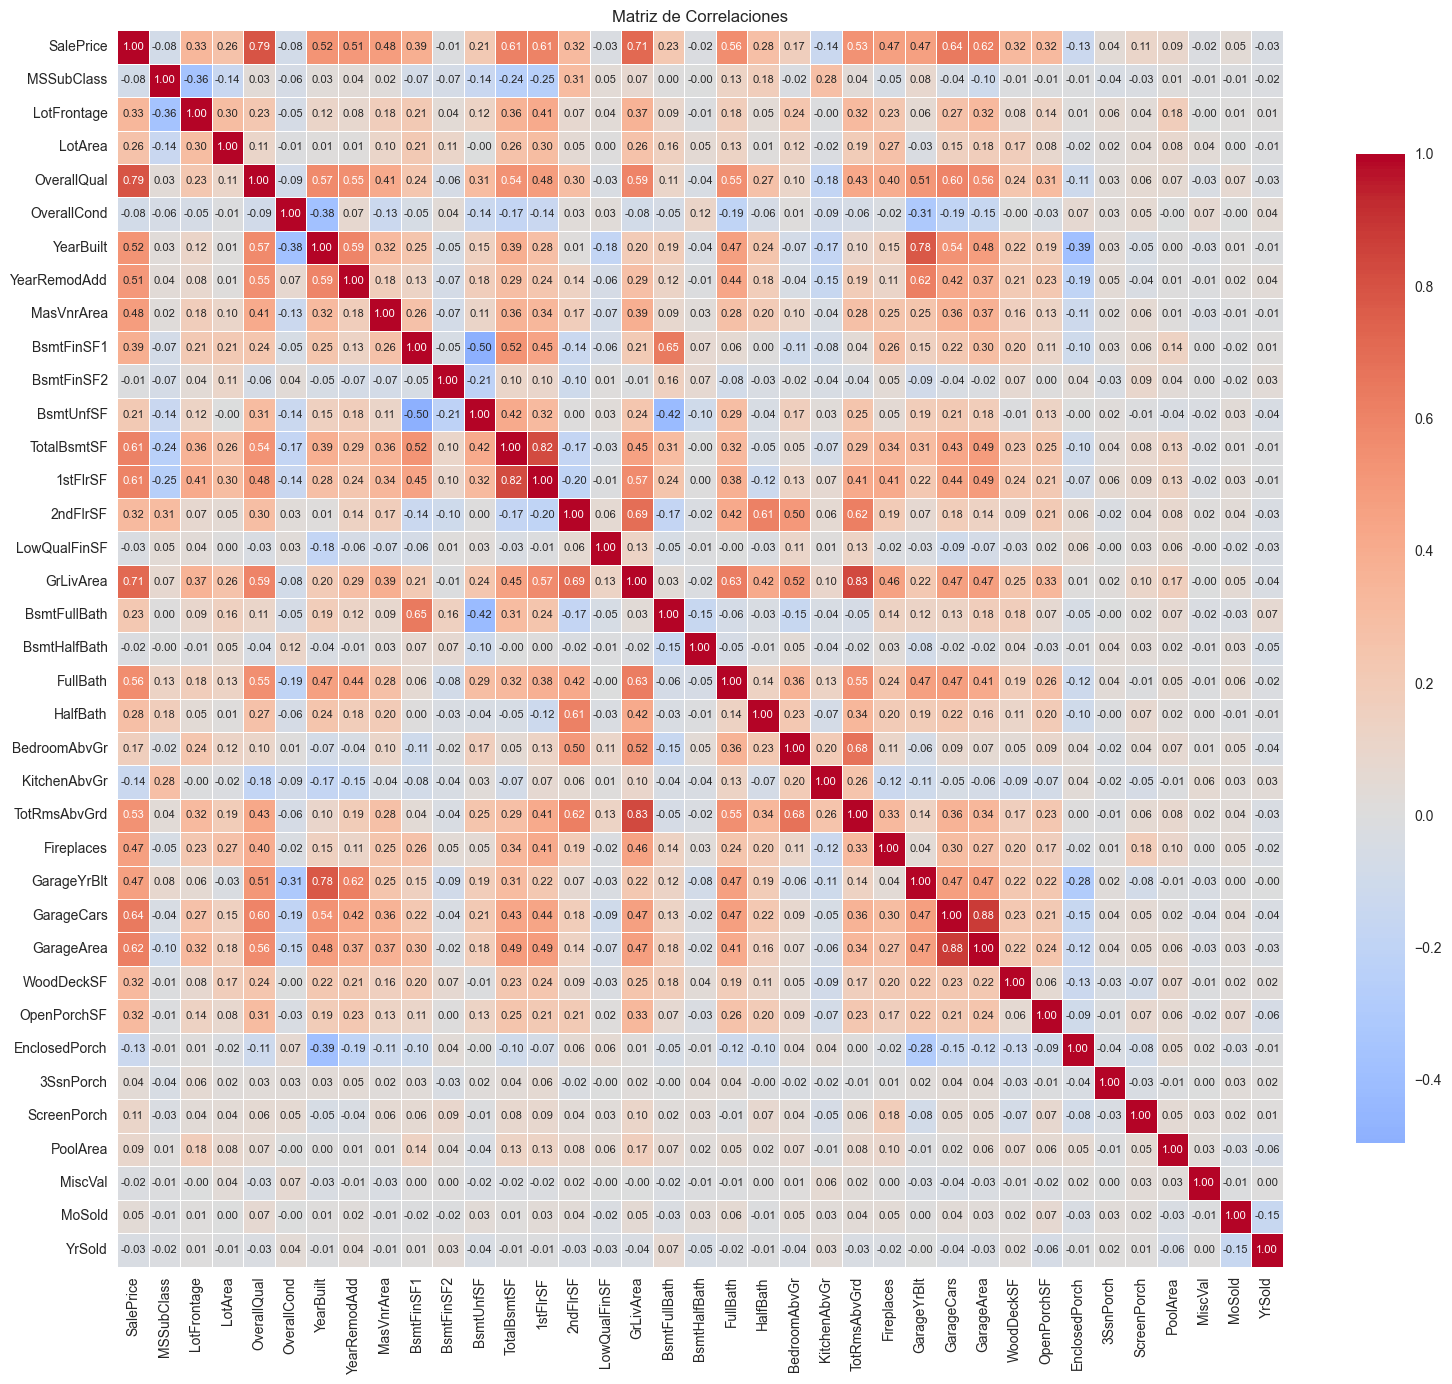

In [152]:

# Calcular matriz de correlaciones
corr_matrix = datost[columnas_numericas].corr()

plt.figure(figsize=(16, 14))

# Crear el heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'shrink': 0.8},  # Reducir el tamaño de la barra de color
            annot_kws={'size': 8},  # Reducir el tamaño de la fuente de los números
            linewidths=0.5)


plt.xticks(rotation=90)  # Rota las etiquetas del eje X
plt.yticks(rotation=0)   # Rota las etiquetas del eje Y (si es necesario)


plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datos_numericos)
X_scaled = pd.DataFrame(X_scaled, columns=datos_numericos.columns)

<p>Observando la matriz de correlacíon podemos ver que hay varias columnas que no tienen una buena correlación con la variable SalePrice, la cual es la que nos interesa evaluar para los futuros modelos, por lo tanto solamente trabajaremos con: </p>

SalePrice,OverallQual ,GrLivArea,GarageCars


<p> Se puede observar que las columnas que vamos a utilizar no tienen valores nulos, por lo tanto no hay que corregir el dataframe. </p>

In [8]:
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

numeric_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']

# Filtrando el DataFrame para obtener solo las columnas que te interesan
columns_to_select = categorical_columns + numeric_columns
datost = datost[columns_to_select]

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datost[numeric_columns] = scaler.fit_transform(datost[numeric_columns])

In [60]:
# Verificar que ambas tablas tienen la misma cantidad de filas
print("\nFilas en datos numéricos:", len(datos_numericos))
print("Filas en datos categóricos:", len(letras))

#columnas_usar = ["SalePrice","OverallQual" ,"GrLivArea","GarageCars"]


# Unir ambos datasets
datos_limpiados = datost.copy()
datos_limpiados2 = datos_limpiados.copy()

# Mostrar el resultado final
print("\nDatos combinados después de la limpieza:")
datos_limpiados.head()



Filas en datos numéricos: 1460
Filas en datos categóricos: 1460

Datos combinados después de la limpieza:


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,OverallQual,GrLivArea,GarageCars
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,Gd,MnPrv,Shed,WD,Normal,208500,7,1710,2
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Y,Gd,MnPrv,Shed,WD,Normal,181500,6,1262,2
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,Gd,MnPrv,Shed,WD,Normal,223500,7,1786,2
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Y,Gd,MnPrv,Shed,WD,Abnorml,140000,7,1717,3
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Y,Gd,MnPrv,Shed,WD,Normal,250000,8,2198,3


# Analisis para observar que variables categoricas son las mejores para el modelo #

In [10]:
from sklearn.feature_selection import f_classif

# Aplica ANOVA a cada variable categórica
anova_scores = []
for col in categorical_columns:
    X_cat = datos_limpiados[col].astype('category').cat.codes.values.reshape(-1, 1)
    f_score, _ = f_classif(X_cat, datos_limpiados['SalePrice'])
    anova_scores.append(f_score[0])

for col, score in zip(categorical_columns, anova_scores):
    print(f"{col}: {score}")

MSZoning: 1.7427925033233271
Street: 1.8707163691968878
Alley: 1.0829665591311617
LotShape: 1.4040637070125206
LandContour: 1.0793229273003802
Utilities: 0.23979596482992555
LotConfig: 0.9605177757733244
LandSlope: 1.1951228349694856
Neighborhood: 1.2504812992396086
Condition1: 0.7777434917901039
Condition2: 1.53690833279312
BldgType: 1.023017198116637
HouseStyle: 1.0396859243806844
RoofStyle: 1.1735913279300674
RoofMatl: 1.0687849226292692
Exterior1st: 0.9812420008434056
Exterior2nd: 1.0138333008684413
MasVnrType: 1.9702413882048169
ExterQual: 3.7748828876663105
ExterCond: 0.869631122792361
Foundation: 1.4988459189847005
BsmtQual: 3.0119378419272
BsmtCond: 0.9979438597722142
BsmtExposure: 1.3802654589121763
BsmtFinType1: 0.9808357448129525
BsmtFinType2: 0.8564053810613717
Heating: 1.4797213891452388
HeatingQC: 1.2876555108870527
CentralAir: 1.5722758791235756
Electrical: 1.1286839937138475
KitchenQual: 2.9047453946078408
Functional: 0.8039921226528484
FireplaceQu: 1.1879001573578267
G

In [11]:
categoricas_utilziar= [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageFinish",
    "MasVnrType",
    "MSZoning",
    "Street",
    "Condition2",
    "CentralAir"
]

datos_limpiados = datos_limpiados[categoricas_utilziar + numeric_columns]

datos_limpiados.dtypes

ExterQual       object
BsmtQual        object
KitchenQual     object
GarageFinish    object
MasVnrType      object
MSZoning        object
Street          object
Condition2      object
CentralAir      object
SalePrice        int64
OverallQual      int64
GrLivArea        int64
GarageCars       int64
dtype: object

In [13]:
datos_limpiados3 = datos_limpiados.copy()

In [159]:
datos_limpiados3.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.362685e-16,1.387018e-16,-1.277517e-16,1.216683e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.838704e+00,-3.688413e+00,-2.249120e+00,-2.365440e+00
25%,-6.415162e-01,-7.951515e-01,-7.347485e-01,-1.026858e+00
50%,-2.256643e-01,-7.183611e-02,-9.797004e-02,3.117246e-01
75%,4.165294e-01,6.514792e-01,4.974036e-01,3.117246e-01
max,7.228819e+00,2.821425e+00,7.855574e+00,2.988889e+00


<P> Se puede observar que los datos tienen la mayoria valores muy similares, por lo tanto no hay que hacer modificaciones para el modelo. </p>

# Creacion de la variable categorica/respuesta PriceType  #

In [14]:
# Calcular los percentiles 33 y 66
p33 = datos_limpiados3['SalePrice'].quantile(0.33)
p66 = datos_limpiados3['SalePrice'].quantile(0.66)

# Crear la nueva variable categórica
def categorizar_precio(precio):
    if precio <= p33:
        return 'Economicas'
    elif precio <= p66:
        return 'Intermedias'
    else:
        return 'Caras'

# Aplicar la función al dataframe
datos_limpiados3['PriceType'] = datos_limpiados3['SalePrice'].apply(categorizar_precio)

print(datos_limpiados3[['SalePrice', 'PriceType']])
print('Percentil 33: ', p33, 'Percentil 66: ', p66 )

      SalePrice    PriceType
0        208500        Caras
1        181500  Intermedias
2        223500        Caras
3        140000  Intermedias
4        250000        Caras
...         ...          ...
1455     175000  Intermedias
1456     210000        Caras
1457     266500        Caras
1458     142125  Intermedias
1459     147500  Intermedias

[1460 rows x 2 columns]
Percentil 33:  139000.0 Percentil 66:  189893.00000000006


In [161]:
datos_limpiados3.groupby('PriceType').size()

PriceType
Caras          497
Economicas     483
Intermedias    480
dtype: int64

In [162]:
datos_limpiados3['PriceType']

0             Caras
1       Intermedias
2             Caras
3       Intermedias
4             Caras
           ...     
1455    Intermedias
1456          Caras
1457          Caras
1458    Intermedias
1459    Intermedias
Name: PriceType, Length: 1460, dtype: object

# Se empieza a trabajar #

In [15]:
y = datos_limpiados3.pop("PriceType")


In [16]:
nombre_categoricas = [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageFinish",
    "MasVnrType",
    "MSZoning",
    "Street",
    "Condition2",
    "CentralAir"
]

nombre_numericas = [
    "SalePrice",
    "OverallQual",
    "GrLivArea",
    "GarageCars"
]

categoricas = datos_limpiados3[nombre_categoricas]
numericas = datos_limpiados3[nombre_numericas]

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Se preparan los preprocesadores
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")


#Se transforman las colunas usando los preprocesadores
from sklearn.compose import ColumnTransformer

preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,nombre_categoricas),
    ('numerico', numeric_preprocessor,nombre_numericas)
],remainder="passthrough")

pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('modelo', LogisticRegression())
])

In [18]:
import random
X = datos_limpiados3
random.seed(123)

In [19]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=37)

In [168]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 1086 to 844
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ExterQual     1021 non-null   object 
 1   BsmtQual      1021 non-null   object 
 2   KitchenQual   1021 non-null   object 
 3   GarageFinish  1021 non-null   object 
 4   MasVnrType    1021 non-null   object 
 5   MSZoning      1021 non-null   object 
 6   Street        1021 non-null   object 
 7   Condition2    1021 non-null   object 
 8   CentralAir    1021 non-null   object 
 9   SalePrice     1021 non-null   float64
 10  OverallQual   1021 non-null   float64
 11  GrLivArea     1021 non-null   float64
 12  GarageCars    1021 non-null   float64
dtypes: float64(4), object(9)
memory usage: 111.7+ KB


In [169]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 492 to 455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ExterQual     438 non-null    object 
 1   BsmtQual      438 non-null    object 
 2   KitchenQual   438 non-null    object 
 3   GarageFinish  438 non-null    object 
 4   MasVnrType    438 non-null    object 
 5   MSZoning      438 non-null    object 
 6   Street        438 non-null    object 
 7   Condition2    438 non-null    object 
 8   CentralAir    438 non-null    object 
 9   SalePrice     438 non-null    float64
 10  OverallQual   438 non-null    float64
 11  GrLivArea     438 non-null    float64
 12  GarageCars    438 non-null    float64
dtypes: float64(4), object(9)
memory usage: 47.9+ KB


In [170]:
X.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.362685e-16,1.387018e-16,-1.277517e-16,1.216683e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.838704e+00,-3.688413e+00,-2.249120e+00,-2.365440e+00
25%,-6.415162e-01,-7.951515e-01,-7.347485e-01,-1.026858e+00
50%,-2.256643e-01,-7.183611e-02,-9.797004e-02,3.117246e-01
75%,4.165294e-01,6.514792e-01,4.974036e-01,3.117246e-01
max,7.228819e+00,2.821425e+00,7.855574e+00,2.988889e+00


# Modelos para conjunto de train #

In [20]:
# Ajusta el pipeline con X_test (¡no con X completo!)
pipeline.fit(X_test, y_test)

# Predice con X_test (el pipeline aplicará las transformaciones)
y_predtrain = pipeline.predict(X_test)

# Primer modelo #

In [21]:
from sklearn.neural_network import MLPClassifier

pipeline_mlp = Pipeline([
    ('preprocesador', preprocesador),  
    ('modelo', MLPClassifier(
        hidden_layer_sizes=(3, 4),  
        max_iter=1000,              
        verbose=True                
    ))
])

pipeline_mlp.fit(X_test, y_test)

y_predtrain = pipeline_mlp.predict(X_test)

print("Predicciones:", y_predtrain[:10])

Iteration 1, loss = 1.24881159
Iteration 2, loss = 1.24011225
Iteration 3, loss = 1.23161442
Iteration 4, loss = 1.22418624
Iteration 5, loss = 1.21782891
Iteration 6, loss = 1.21219743
Iteration 7, loss = 1.20702810
Iteration 8, loss = 1.20198980
Iteration 9, loss = 1.19741952
Iteration 10, loss = 1.19260639
Iteration 11, loss = 1.18781571
Iteration 12, loss = 1.18287815
Iteration 13, loss = 1.17782598
Iteration 14, loss = 1.17274730
Iteration 15, loss = 1.16777316
Iteration 16, loss = 1.16244212
Iteration 17, loss = 1.15686129
Iteration 18, loss = 1.15149375
Iteration 19, loss = 1.14572531
Iteration 20, loss = 1.13949763
Iteration 21, loss = 1.13356777
Iteration 22, loss = 1.12718538
Iteration 23, loss = 1.12158678
Iteration 24, loss = 1.11580017
Iteration 25, loss = 1.11022288
Iteration 26, loss = 1.10467497
Iteration 27, loss = 1.09936942
Iteration 28, loss = 1.09402502
Iteration 29, loss = 1.08853285
Iteration 30, loss = 1.08361082
Iteration 31, loss = 1.07866883
Iteration 32, los

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


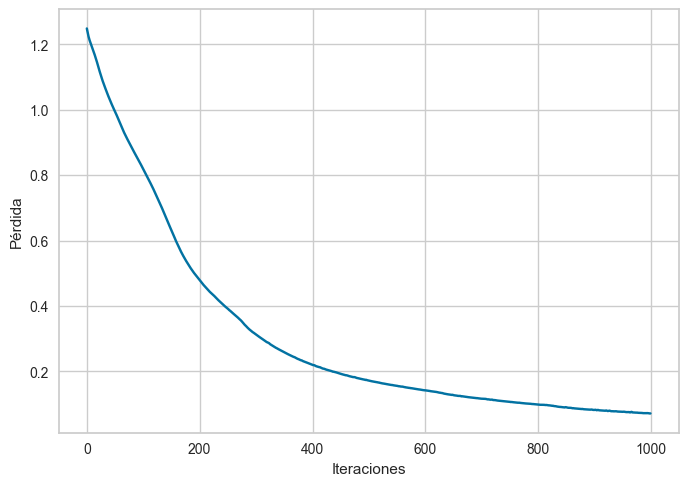

In [22]:
mlp_trained = pipeline_mlp.named_steps['modelo']
plt.plot(mlp_trained.loss_curve_)
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

# Segundo modelo #

In [23]:
pipeline_mlp2 = Pipeline([
    ('preprocesador', preprocesador),  
    ('modelo', MLPClassifier(
        hidden_layer_sizes=(5, 3), 
        activation='tanh',         
        max_iter=1000,
        verbose=True
    ))
])

# Entrenamiento
pipeline_mlp2.fit(X_test, y_test)

# Predicciones
y_predtrain2 = pipeline_mlp2.predict(X_test)

Iteration 1, loss = 1.41192480
Iteration 2, loss = 1.39131115
Iteration 3, loss = 1.37029087
Iteration 4, loss = 1.34976860
Iteration 5, loss = 1.32905813
Iteration 6, loss = 1.30839764
Iteration 7, loss = 1.28819443
Iteration 8, loss = 1.26870655
Iteration 9, loss = 1.24838972
Iteration 10, loss = 1.22989046
Iteration 11, loss = 1.21114851
Iteration 12, loss = 1.19329346
Iteration 13, loss = 1.17598524
Iteration 14, loss = 1.15897566
Iteration 15, loss = 1.14307039
Iteration 16, loss = 1.12772574
Iteration 17, loss = 1.11332955
Iteration 18, loss = 1.09873962
Iteration 19, loss = 1.08516417
Iteration 20, loss = 1.07236326
Iteration 21, loss = 1.05963363
Iteration 22, loss = 1.04768826
Iteration 23, loss = 1.03606232
Iteration 24, loss = 1.02524642
Iteration 25, loss = 1.01514719
Iteration 26, loss = 1.00543789
Iteration 27, loss = 0.99595713
Iteration 28, loss = 0.98676317
Iteration 29, loss = 0.97806689
Iteration 30, loss = 0.96953233
Iteration 31, loss = 0.96121961
Iteration 32, los

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


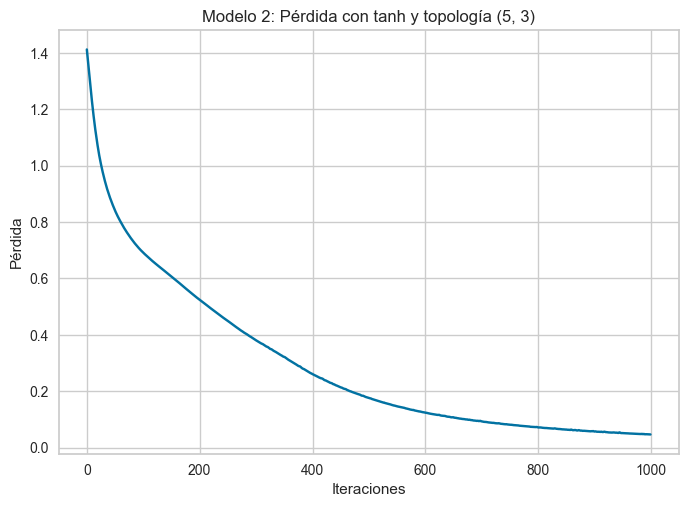

In [24]:
plt.plot(pipeline_mlp2.named_steps['modelo'].loss_curve_)
plt.title('Modelo 2: Pérdida con tanh y topología (5, 3)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

In [25]:
print("Accuracy Modelo 1:", accuracy_score(y_test, y_predtrain))
print("Accuracy Modelo 2:", accuracy_score(y_test, y_predtrain2))

Accuracy Modelo 1: 0.9885844748858448
Accuracy Modelo 2: 0.9954337899543378


# Modelos para conjunto de test #

In [26]:
# Ajusta el pipeline con X_train (¡no con X completo!)
pipeline.fit(X_train, y_train)

# Predice con X_test (el pipeline aplicará las transformaciones)
y_pred = pipeline.predict(X_test)

# Primer modelo # 


In [27]:
from sklearn.neural_network import MLPClassifier

pipeline_mlp = Pipeline([
    ('preprocesador', preprocesador),  
    ('modelo', MLPClassifier(
        hidden_layer_sizes=(3, 4),  
        max_iter=1000,              
        verbose=True                
    ))
])

pipeline_mlp.fit(X_train, y_train)

y_pred = pipeline_mlp.predict(X_test)

print("Predicciones:", y_pred[:10])

Iteration 1, loss = 1.19686451
Iteration 2, loss = 1.16988536
Iteration 3, loss = 1.14883920
Iteration 4, loss = 1.13142496
Iteration 5, loss = 1.11748065
Iteration 6, loss = 1.10548642
Iteration 7, loss = 1.09470675
Iteration 8, loss = 1.08620268
Iteration 9, loss = 1.07858588
Iteration 10, loss = 1.07248132
Iteration 11, loss = 1.06585630
Iteration 12, loss = 1.06026934
Iteration 13, loss = 1.05474477
Iteration 14, loss = 1.04915413
Iteration 15, loss = 1.04337991
Iteration 16, loss = 1.03808294
Iteration 17, loss = 1.03224273
Iteration 18, loss = 1.02592580
Iteration 19, loss = 1.02000719
Iteration 20, loss = 1.01367440
Iteration 21, loss = 1.00775983
Iteration 22, loss = 1.00093168
Iteration 23, loss = 0.99427856
Iteration 24, loss = 0.98774640
Iteration 25, loss = 0.98050618
Iteration 26, loss = 0.97315097
Iteration 27, loss = 0.96501868
Iteration 28, loss = 0.95625142
Iteration 29, loss = 0.94609352
Iteration 30, loss = 0.93491791
Iteration 31, loss = 0.92227868
Iteration 32, los

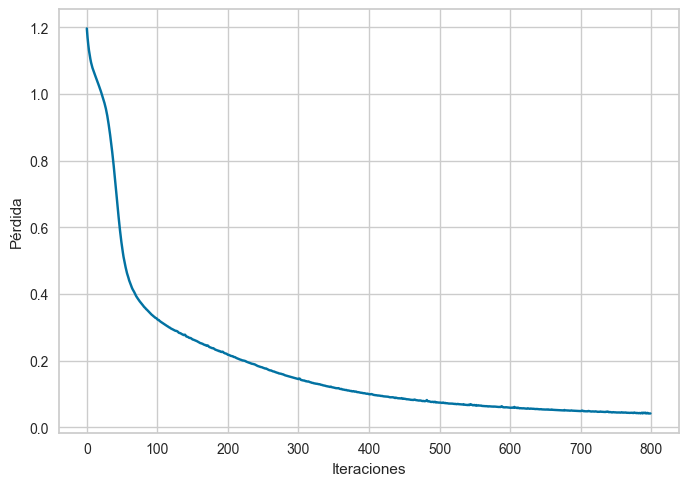

In [28]:
mlp_trained = pipeline_mlp.named_steps['modelo']
plt.plot(mlp_trained.loss_curve_)
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

# Segundo Modelo #

In [29]:
pipeline_mlp2 = Pipeline([
    ('preprocesador', preprocesador),  
    ('modelo', MLPClassifier(
        hidden_layer_sizes=(5, 3), 
        activation='tanh',         
        max_iter=1000,
        verbose=True
    ))
])

# Entrenamiento
pipeline_mlp2.fit(X_train, y_train)

# Predicciones
y_pred2 = pipeline_mlp2.predict(X_test)



Iteration 1, loss = 1.01051195
Iteration 2, loss = 0.98809043
Iteration 3, loss = 0.96887627
Iteration 4, loss = 0.95129614
Iteration 5, loss = 0.93400465
Iteration 6, loss = 0.91762232
Iteration 7, loss = 0.90146850
Iteration 8, loss = 0.88617080
Iteration 9, loss = 0.87197074
Iteration 10, loss = 0.85832928
Iteration 11, loss = 0.84528719
Iteration 12, loss = 0.83297253
Iteration 13, loss = 0.82128353
Iteration 14, loss = 0.81009752
Iteration 15, loss = 0.79955988
Iteration 16, loss = 0.78906311
Iteration 17, loss = 0.77896683
Iteration 18, loss = 0.76929703
Iteration 19, loss = 0.75979466
Iteration 20, loss = 0.75056572
Iteration 21, loss = 0.74130150
Iteration 22, loss = 0.73229712
Iteration 23, loss = 0.72342617
Iteration 24, loss = 0.71488540
Iteration 25, loss = 0.70627330
Iteration 26, loss = 0.69784941
Iteration 27, loss = 0.68963167
Iteration 28, loss = 0.68163566
Iteration 29, loss = 0.67364982
Iteration 30, loss = 0.66581745
Iteration 31, loss = 0.65816303
Iteration 32, los

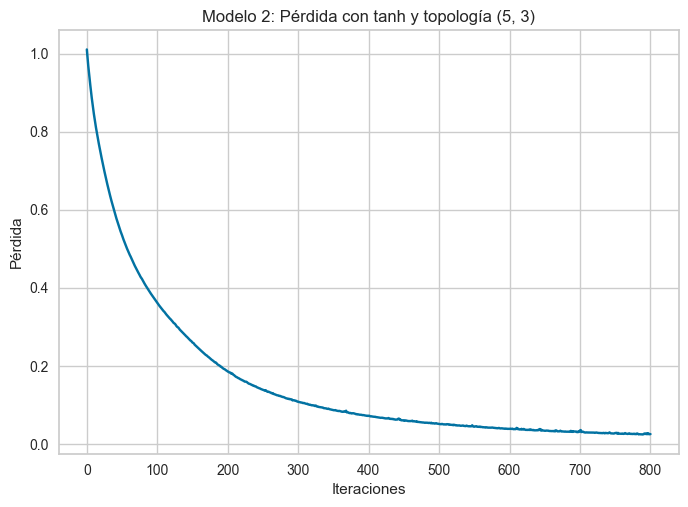

In [30]:
plt.plot(pipeline_mlp2.named_steps['modelo'].loss_curve_)
plt.title('Modelo 2: Pérdida con tanh y topología (5, 3)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

In [31]:
print("Accuracy Modelo 1:", accuracy_score(y_test, y_pred))
print("Accuracy Modelo 2:", accuracy_score(y_test, y_pred2))

Accuracy Modelo 1: 0.9726027397260274
Accuracy Modelo 2: 0.9680365296803652


La precision del modelo es similar tanto para el conjunto de train como el de test ademas que esta es bastante alta lo cual nos indica que el modelo predice muy bien nuestros, por lo tanto no se considera que el modelo sufra de overfitting o underfitting.

# Predecir el precio de las casas #


In [32]:
# Usar el primer modelo para predecir
y_pred_modelo1 = pipeline_mlp.predict(X_test)

# Usar el segundo modelo para predecir
y_pred_modelo2 = pipeline_mlp2.predict(X_test)

In [33]:
# Métricas para el Modelo 1
print("--- Modelo 1 ---")
print(classification_report(y_test, y_pred_modelo1))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_modelo1))

# Métricas para el Modelo 2
print("\n--- Modelo 2 ---")
print(classification_report(y_test, y_pred_modelo2))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_modelo2))

--- Modelo 1 ---
              precision    recall  f1-score   support

       Caras       0.99      0.97      0.98       150
  Economicas       0.98      0.99      0.98       134
 Intermedias       0.96      0.97      0.96       154

    accuracy                           0.97       438
   macro avg       0.97      0.97      0.97       438
weighted avg       0.97      0.97      0.97       438

Matriz de confusión:
 [[145   0   5]
 [  0 132   2]
 [  2   3 149]]

--- Modelo 2 ---
              precision    recall  f1-score   support

       Caras       0.99      0.97      0.98       150
  Economicas       0.96      0.99      0.97       134
 Intermedias       0.96      0.95      0.95       154

    accuracy                           0.97       438
   macro avg       0.97      0.97      0.97       438
weighted avg       0.97      0.97      0.97       438

Matriz de confusión:
 [[145   0   5]
 [  0 133   1]
 [  2   6 146]]


In [34]:
comparacion = pd.DataFrame({
    'Real': y_test,
    'Prediccion_Modelo1': y_pred_modelo1,
    'Prediccion_Modelo2': y_pred_modelo2
})

print(comparacion.head(10)) 

             Real Prediccion_Modelo1 Prediccion_Modelo2
492   Intermedias        Intermedias        Intermedias
65          Caras              Caras              Caras
889   Intermedias        Intermedias        Intermedias
1173        Caras              Caras              Caras
1206   Economicas         Economicas         Economicas
672   Intermedias        Intermedias        Intermedias
724         Caras              Caras              Caras
445    Economicas         Economicas         Economicas
97     Economicas         Economicas         Economicas
148   Intermedias         Economicas         Economicas


Modelo 1 (Topología: (3,4), Activación: relu):
              precision    recall  f1-score   support

       Caras       0.99      0.97      0.98       150
  Economicas       0.98      0.99      0.98       134
 Intermedias       0.96      0.97      0.96       154

    accuracy                           0.97       438
   macro avg       0.97      0.97      0.97       438
weighted avg       0.97      0.97      0.97       438

Matriz de Confusión:


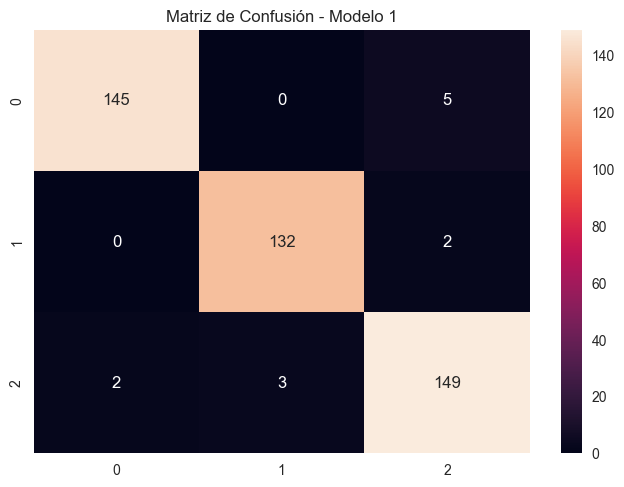


Modelo 2 (Topología: (5,3), Activación: tanh):
              precision    recall  f1-score   support

       Caras       0.99      0.97      0.98       150
  Economicas       0.96      0.99      0.97       134
 Intermedias       0.96      0.95      0.95       154

    accuracy                           0.97       438
   macro avg       0.97      0.97      0.97       438
weighted avg       0.97      0.97      0.97       438

Matriz de Confusión:


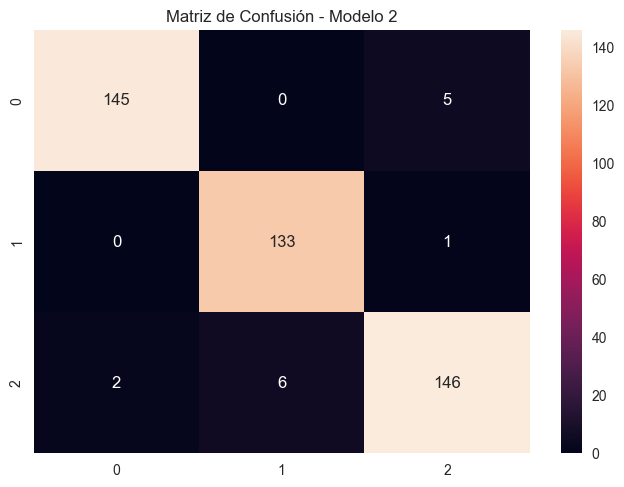

In [35]:
# Métricas para el Modelo 1
print("Modelo 1 (Topología: (3,4), Activación: relu):")
print(classification_report(y_test, y_pred_modelo1))
print("Matriz de Confusión:")
sns.heatmap(confusion_matrix(y_test, y_pred_modelo1), annot=True, fmt="d")
plt.title("Matriz de Confusión - Modelo 1")
plt.show()

# Métricas para el Modelo 2
print("\nModelo 2 (Topología: (5,3), Activación: tanh):")
print(classification_report(y_test, y_pred_modelo2))
print("Matriz de Confusión:")
sns.heatmap(confusion_matrix(y_test, y_pred_modelo2), annot=True, fmt="d")
plt.title("Matriz de Confusión - Modelo 2")
plt.show()

In [36]:
import time

# Tiempo de entrenamiento - Modelo 1
start_time = time.time()
pipeline_mlp.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento (Modelo 1): {end_time - start_time:.2f} segundos")

# Tiempo de entrenamiento - Modelo 2
start_time = time.time()
pipeline_mlp2.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento (Modelo 2): {end_time - start_time:.2f} segundos")

Iteration 1, loss = 1.18117541
Iteration 2, loss = 1.16158667
Iteration 3, loss = 1.14296764
Iteration 4, loss = 1.12400193
Iteration 5, loss = 1.10441493
Iteration 6, loss = 1.08737904
Iteration 7, loss = 1.06985288
Iteration 8, loss = 1.05332565
Iteration 9, loss = 1.03886455
Iteration 10, loss = 1.02492159
Iteration 11, loss = 1.01183621
Iteration 12, loss = 0.99955251
Iteration 13, loss = 0.98844447
Iteration 14, loss = 0.97809673
Iteration 15, loss = 0.96884287
Iteration 16, loss = 0.96013541
Iteration 17, loss = 0.95153651
Iteration 18, loss = 0.94410247
Iteration 19, loss = 0.93656348
Iteration 20, loss = 0.92999369
Iteration 21, loss = 0.92313644
Iteration 22, loss = 0.91685651
Iteration 23, loss = 0.91090799
Iteration 24, loss = 0.90514591
Iteration 25, loss = 0.89963930
Iteration 26, loss = 0.89437700
Iteration 27, loss = 0.88936104
Iteration 28, loss = 0.88431097
Iteration 29, loss = 0.87968368
Iteration 30, loss = 0.87517259
Iteration 31, loss = 0.87068452
Iteration 32, los

In [37]:
# Comparar errores en cada clase
errores_modelo1 = y_test != y_pred_modelo1
errores_modelo2 = y_test != y_pred_modelo2

print("Errores por categoría (Modelo 1):")
print(pd.crosstab(y_test, errores_modelo1, rownames=['Real'], colnames=['Error']))

print("\nErrores por categoría (Modelo 2):")
print(pd.crosstab(y_test, errores_modelo2, rownames=['Real'], colnames=['Error']))

Errores por categoría (Modelo 1):
Error        False  True 
Real                     
Caras          145      5
Economicas     132      2
Intermedias    149      5

Errores por categoría (Modelo 2):
Error        False  True 
Real                     
Caras          145      5
Economicas     133      1
Intermedias    146      8


In [ ]:
errores_combinados = (y_test != y_pred_modelo1) & (y_test != y_pred_modelo2)
print("\nCasos difíciles (ambos modelos fallan):")
print(X_test[errores_combinados])


Casos difíciles (ambos modelos fallan):
     ExterQual BsmtQual KitchenQual GarageFinish MasVnrType MSZoning Street  \
148         TA       Gd          Gd          Unf    BrkFace       RL   Pave   
1210        Gd       Gd          Gd          RFn    BrkFace       RL   Pave   
523         Ex       Ex          Ex          Fin      Stone       RL   Pave   
166         Gd       TA          TA          Fin    BrkFace       RL   Pave   
597         Gd       Ex          Gd          Fin    BrkFace       RL   Pave   
446         Gd       TA          Gd          Fin    BrkFace       RL   Pave   
364         TA       Gd          TA          Fin    BrkFace       RL   Pave   
843         TA       TA          TA          Unf    BrkFace       RL   Pave   
331         TA       TA          TA          RFn    BrkFace       RL   Pave   

     Condition2 CentralAir  SalePrice  OverallQual  GrLivArea  GarageCars  
148        Norm          Y     141000            7       1080           0  
1210       Norm 

# Tuneo del modelo #

In [39]:
param_grid = {
    "modelo__hidden_layer_sizes": [(50,), (100,)],
    "modelo__activation": ["relu", "tanh"],
    "modelo__alpha": [0.0001, 0.01],
    "modelo__learning_rate_init": [0.001, 0.01],
}

grid = GridSearchCV(pipeline_mlp, param_grid, cv=3, scoring="accuracy")
grid.fit(X, y)

print("Mejor modelo:", grid.best_params_)

Iteration 1, loss = 1.16327277
Iteration 2, loss = 1.02783670
Iteration 3, loss = 0.92491228
Iteration 4, loss = 0.84906644
Iteration 5, loss = 0.78869988
Iteration 6, loss = 0.73745909
Iteration 7, loss = 0.69482466
Iteration 8, loss = 0.65721784
Iteration 9, loss = 0.62539056
Iteration 10, loss = 0.59786082
Iteration 11, loss = 0.57428299
Iteration 12, loss = 0.55411565
Iteration 13, loss = 0.53605634
Iteration 14, loss = 0.52095580
Iteration 15, loss = 0.50784198
Iteration 16, loss = 0.49672782
Iteration 17, loss = 0.48642165
Iteration 18, loss = 0.47741339
Iteration 19, loss = 0.46927161
Iteration 20, loss = 0.46130665
Iteration 21, loss = 0.45444461
Iteration 22, loss = 0.44803898
Iteration 23, loss = 0.44138414
Iteration 24, loss = 0.43588335
Iteration 25, loss = 0.42997893
Iteration 26, loss = 0.42459918
Iteration 27, loss = 0.41952525
Iteration 28, loss = 0.41464864
Iteration 29, loss = 0.40988028
Iteration 30, loss = 0.40534310
Iteration 31, loss = 0.40089311
Iteration 32, los

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.56572060
Iteration 13, loss = 0.54891800
Iteration 14, loss = 0.53439907
Iteration 15, loss = 0.52060774
Iteration 16, loss = 0.50884936
Iteration 17, loss = 0.49834040
Iteration 18, loss = 0.48835120
Iteration 19, loss = 0.47922171
Iteration 20, loss = 0.47110867
Iteration 21, loss = 0.46309331
Iteration 22, loss = 0.45564318
Iteration 23, loss = 0.44881270
Iteration 24, loss = 0.44228193
Iteration 25, loss = 0.43623568
Iteration 26, loss = 0.43044369
Iteration 27, loss = 0.42472763
Iteration 28, loss = 0.41951715
Iteration 29, loss = 0.41419009
Iteration 30, loss = 0.40939248
Iteration 31, loss = 0.40486381
Iteration 32, loss = 0.40022971
Iteration 33, loss = 0.39575696
Iteration 34, loss = 0.39182785
Iteration 35, loss = 0.38776790
Iteration 36, loss = 0.38392811
Iteration 37, loss = 0.38027679
Iteration 38, loss = 0.37648666
Iteration 39, loss = 0.37304878
Iteration 40, loss = 0.36980128
Iteration 41, loss = 0.36647281
Iteration 42, loss = 0.36322869
Iteratio

# Modelo con salePrice de variable Categorica #

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

datos = datos_limpiados2.copy()

# Definir variables
variables_categoricas = [
    "ExterQual", "BsmtQual", "KitchenQual", 
    "GarageFinish", "MasVnrType", "MSZoning",
    "Street", "Condition2", "CentralAir"
]

variables_numericas = [
    "OverallQual", "GrLivArea", "GarageCars"
]

X = datos[variables_categoricas + variables_numericas]
y = datos["SalePrice"]  

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Preprocesador para variables numéricas
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  #
    ('scaler', StandardScaler())  
])

# Preprocesador para variables categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  

preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, variables_categoricas),
    ('num', numeric_transformer, variables_numericas)
])

In [ ]:
from sklearn.neural_network import MLPRegressor

pipeline_modelo1 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(
        hidden_layer_sizes=(50, 30),  
        activation='relu',           
        solver='adam',               
        max_iter=1000,               
        random_state=42,             
        verbose=True                
    ))
])

# modelo 2 #

In [ ]:
pipeline_modelo2 = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', MLPRegressor(
        hidden_layer_sizes=(100, 50, 20),  # 3 capas: 100, 50 y 20 neuronas
        activation='tanh',               
        solver='adam',
        max_iter=1000,
        random_state=42,
        verbose=True
    ))
])

In [71]:
# Entrenar ambos modelos
pipeline_modelo1.fit(X_train, y_train)
pipeline_modelo2.fit(X_train, y_train)

# Predecir y evaluar
y_pred1 = pipeline_modelo1.predict(X_test)
y_pred2 = pipeline_modelo2.predict(X_test)

# Métricas para Modelo 1
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, y_pred1)

# Métricas para Modelo 2
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)

# Comparación
print("📊 Comparación de Modelos:")
print(f"Modelo 1 (ReLU, 50-30)  - MSE: {mse1} | RMSE: {rmse1:.2f} | R²: {r2_1:.4f}")
print(f"Modelo 2 (Tanh, 100-50-20) -  MSE: {mse2} | RMSE: {rmse2:.2f} | R²: {r2_2:.4f}")

Iteration 1, loss = 19446388815.64121246
Iteration 2, loss = 19446269159.28866577
Iteration 3, loss = 19446143927.44176483
Iteration 4, loss = 19446002442.72708130
Iteration 5, loss = 19445836133.96989822
Iteration 6, loss = 19445635931.00692368
Iteration 7, loss = 19445390053.66177368
Iteration 8, loss = 19445085323.34928894
Iteration 9, loss = 19444714404.84259796
Iteration 10, loss = 19444268867.10613632
Iteration 11, loss = 19443742501.21338272
Iteration 12, loss = 19443113088.33607864
Iteration 13, loss = 19442384877.68600082
Iteration 14, loss = 19441523971.71822357
Iteration 15, loss = 19440536087.61953735
Iteration 16, loss = 19439391316.01078415
Iteration 17, loss = 19438108406.47964096
Iteration 18, loss = 19436660699.44413757
Iteration 19, loss = 19435037806.84491730
Iteration 20, loss = 19433221809.83183289
Iteration 21, loss = 19431208217.68628311
Iteration 22, loss = 19428945838.19580460
Iteration 23, loss = 19426476194.97208786
Iteration 24, loss = 19423710984.83741760
I

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 19445579490.96457672
Iteration 9, loss = 19445542574.18668747
Iteration 10, loss = 19445509559.36315536
Iteration 11, loss = 19445478931.22101974
Iteration 12, loss = 19445449657.56476212
Iteration 13, loss = 19445421135.77563477
Iteration 14, loss = 19445393500.96165466
Iteration 15, loss = 19445366457.74811172
Iteration 16, loss = 19445339647.53674316
Iteration 17, loss = 19445313510.29219437
Iteration 18, loss = 19445287223.25208664
Iteration 19, loss = 19445261445.50444031
Iteration 20, loss = 19445235771.75300217
Iteration 21, loss = 19445210317.98246765
Iteration 22, loss = 19445184847.23388290
Iteration 23, loss = 19445159815.87565613
Iteration 24, loss = 19445134930.90235519
Iteration 25, loss = 19445109986.38625336
Iteration 26, loss = 19445084857.92456055
Iteration 27, loss = 19445060430.69260025
Iteration 28, loss = 19445035600.46290970
Iteration 29, loss = 19445011005.38852692
Iteration 30, loss = 19444986417.44319916
Iteration 31, loss = 19444961866.739

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


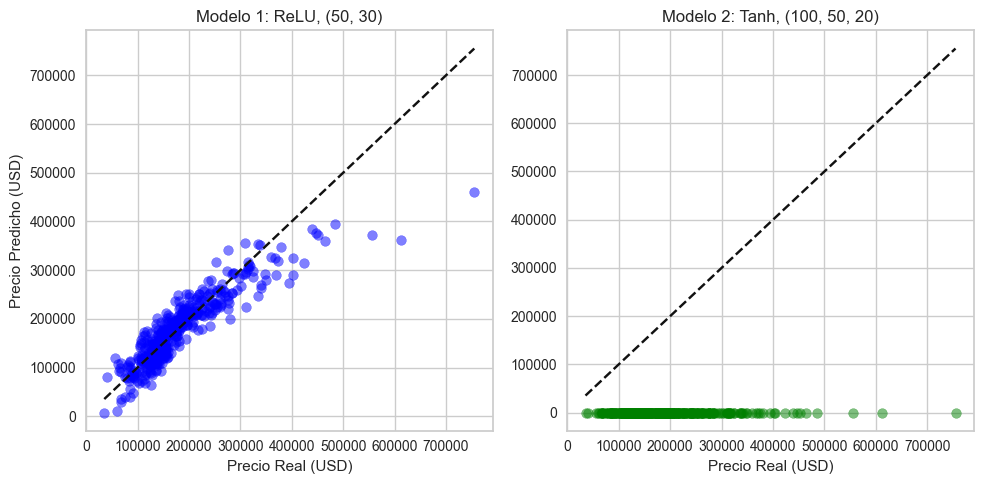

In [70]:
# Gráfico comparativo
plt.figure(figsize=(10, 5))

# Modelo 1
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred1, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Modelo 1: ReLU, (50, 30)")
plt.xlabel("Precio Real (USD)")
plt.ylabel("Precio Predicho (USD)")

# Modelo 2
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred2, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Modelo 2: Tanh, (100, 50, 20)")
plt.xlabel("Precio Real (USD)")

plt.tight_layout()
plt.show()

Se puede observar que el mejor modelo para predecir los precios de las casas fue el primer modelo con 2 capas

# Sobre Ajuste? #

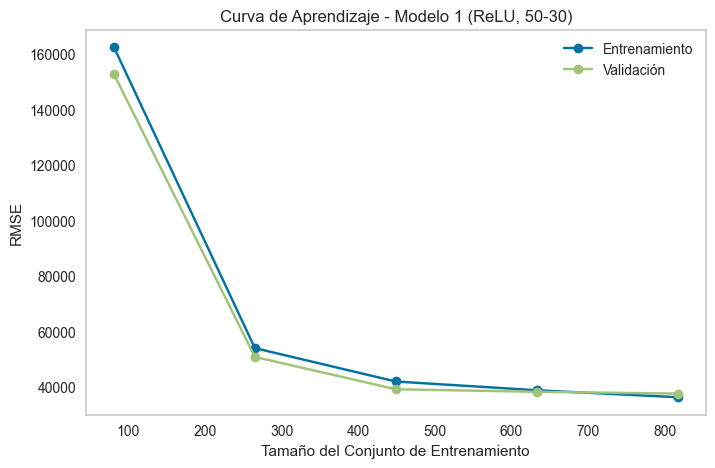

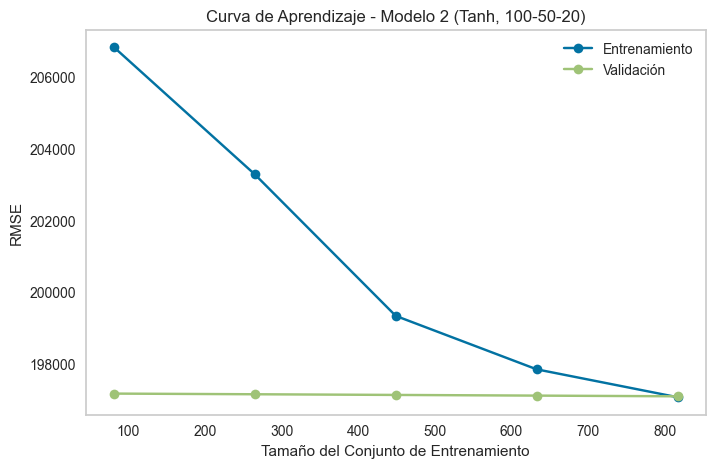

In [78]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=5,  
        scoring='neg_mean_squared_error',  
        train_sizes=np.linspace(0.1, 1.0, 5),  
        n_jobs=-1,
        random_state=42
    )
    
    # Calcular RMSE 
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))
    
    # Graficar
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_rmse, 'o-', label='Entrenamiento')
    plt.plot(train_sizes, test_rmse, 'o-', label='Validación')
    plt.title(f'Curva de Aprendizaje - {model_name}')
    plt.xlabel('Tamaño del Conjunto de Entrenamiento')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(pipeline_modelo1, X_train, y_train, 'Modelo 1 (ReLU, 50-30)')
plot_learning_curve(pipeline_modelo2, X_train, y_train, 'Modelo 2 (Tanh, 100-50-20)')

# Modelo tuneado #

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__hidden_layer_sizes': [(30, 15), (50, 30), (100, 50)],  
    'model__activation': ['relu', 'tanh'],                        
    'model__alpha': [0.0001, 0.001, 0.01],                         
    'model__learning_rate_init': [0.001, 0.01],                    
    'model__early_stopping': [True]                                 
}

In [73]:
# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_modelo1, 
    param_grid=param_grid,
    cv=5,                        
    scoring='neg_mean_squared_error', 
    verbose=2,
    n_jobs=-1                    
)


grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Iteration 1, loss = 19675116765.21812057
Validation score: -5.695249
Iteration 2, loss = 19673401019.93202972
Validation score: -5.694193
Iteration 3, loss = 19669490609.76377869
Validation score: -5.692007
Iteration 4, loss = 19661710115.32686996
Validation score: -5.688075
Iteration 5, loss = 19648165586.89232254
Validation score: -5.681644
Iteration 6, loss = 19626886483.08135986
Validation score: -5.671764
Iteration 7, loss = 19594861209.27069855
Validation score: -5.657275
Iteration 8, loss = 19547805400.62427139
Validation score: -5.636804
Iteration 9, loss = 19483306036.94819260
Validation score: -5.608684
Iteration 10, loss = 19394327104.24259186
Validation score: -5.571163
Iteration 11, loss = 19278008530.69330215
Validation score: -5.522189
Iteration 12, loss = 19126874966.83280563
Validation score: -5.459831
Iteration 13, loss = 18934950083.80417252
Validation score: -5.381892
Iteration 14, loss = 18692131833.2680

In [74]:
# Mejor modelo obtenido
best_model = grid_search.best_estimator_

# Predecir y evaluar
y_pred_optimized = best_model.predict(X_test)
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"- Resultados del modelo optimizado:")
print(f"- RMSE: {rmse_optimized:.2f}")
print(f"- R²: {r2_optimized:.4f}")

- Resultados del modelo optimizado:
- RMSE: 34349.76
- R²: 0.8309


In [75]:
print("- Comparación:")
print(f"- Modelo Original: RMSE = {rmse1:.2f}, R² = {r2_1:.4f}")
print(f"- Modelo Optimizado: RMSE = {rmse_optimized:.2f}, R² = {r2_optimized:.4f}")

- Comparación:
- Modelo Original: RMSE = 36221.74, R² = 0.8120
- Modelo Optimizado: RMSE = 34349.76, R² = 0.8309


In [76]:
y_pred_train = best_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE en entrenamiento: {rmse_train:.2f}")
print(f"RMSE en prueba: {rmse_optimized:.2f}")

RMSE en entrenamiento: 34619.11
RMSE en prueba: 34349.76


Iteration 1, loss = 19600062964.21583939
Validation score: -9.399179
Iteration 2, loss = 19599926169.24107361
Validation score: -9.399100
Iteration 3, loss = 19599783941.63143539
Validation score: -9.399008
Iteration 4, loss = 19599618504.96556854
Validation score: -9.398895
Iteration 5, loss = 19599414743.01328659
Validation score: -9.398757
Iteration 6, loss = 19599162917.21776962
Validation score: -9.398587
Iteration 7, loss = 19598850590.86441040
Validation score: -9.398377
Iteration 8, loss = 19598468559.96806717
Validation score: -9.398124
Iteration 9, loss = 19598006149.94073486
Validation score: -9.397821
Iteration 10, loss = 19597452165.43350983
Validation score: -9.397462
Iteration 11, loss = 19596793730.04927444
Validation score: -9.397040
Iteration 12, loss = 19596019245.75035477
Validation score: -9.396547
Iteration 13, loss = 19595112816.92481995
Validation score: -9.395977
Iteration 14, loss = 19594060068.27383041
Validation score: -9.395316
Iteration 15, loss = 19592846

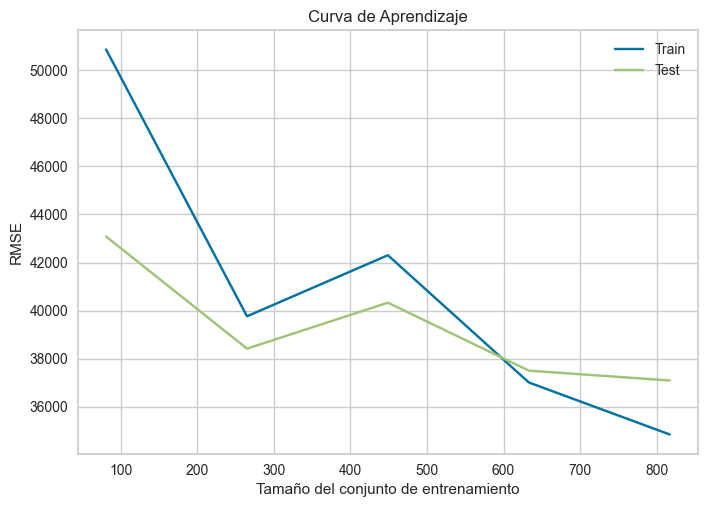

In [77]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, np.sqrt(-train_scores.mean(axis=1)), label='Train')
plt.plot(train_sizes, np.sqrt(-test_scores.mean(axis=1)), label='Test')
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.legend()
plt.title("Curva de Aprendizaje")
plt.show()